In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import random 
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression

In [7]:
df_oil = pd.read_csv(r'C:\Users\SWAPNIL BISWAS\DATASETS\oil.csv',index_col = 0 , parse_dates = [0])
df_holidays = pd.read_csv(r'C:\Users\SWAPNIL BISWAS\DATASETS\holidays_events.csv' , index_col=0, parse_dates=[0])
df_stores = pd.read_csv(r'C:\Users\SWAPNIL BISWAS\DATASETS\stores.csv', index_col=0)
df_transcations = pd.read_csv(r'C:\Users\SWAPNIL BISWAS\DATASETS\transactions.csv', parse_dates=[0])
df_train = pd.read_csv(r'C:\Users\SWAPNIL BISWAS\DATASETS\train.csv',index_col=0, parse_dates=[1])
df_test = pd.read_csv(r'C:\Users\SWAPNIL BISWAS\DATASETS\test.csv', index_col=0, parse_dates=[1])

In [8]:
print(df_oil)

            dcoilwtico
date                  
2013-01-01         NaN
2013-01-02       93.14
2013-01-03       92.97
2013-01-04       93.12
2013-01-07       93.20
...                ...
2017-08-25       47.65
2017-08-28       46.40
2017-08-29       46.46
2017-08-30       45.96
2017-08-31       47.26

[1218 rows x 1 columns]


In [9]:
print(df_holidays)

                  type    locale locale_name                    description  \
date                                                                          
2012-03-02     Holiday     Local       Manta             Fundacion de Manta   
2012-04-01     Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2012-04-12     Holiday     Local      Cuenca            Fundacion de Cuenca   
2012-04-14     Holiday     Local    Libertad      Cantonizacion de Libertad   
2012-04-21     Holiday     Local    Riobamba      Cantonizacion de Riobamba   
...                ...       ...         ...                            ...   
2017-12-22  Additional  National     Ecuador                      Navidad-3   
2017-12-23  Additional  National     Ecuador                      Navidad-2   
2017-12-24  Additional  National     Ecuador                      Navidad-1   
2017-12-25     Holiday  National     Ecuador                        Navidad   
2017-12-26  Additional  National     Ecuador        

In [10]:
print(df_stores)

                    city                           state type  cluster
store_nbr                                                             
1                  Quito                       Pichincha    D       13
2                  Quito                       Pichincha    D       13
3                  Quito                       Pichincha    D        8
4                  Quito                       Pichincha    D        9
5          Santo Domingo  Santo Domingo de los Tsachilas    D        4
6                  Quito                       Pichincha    D       13
7                  Quito                       Pichincha    D        8
8                  Quito                       Pichincha    D        8
9                  Quito                       Pichincha    B        6
10                 Quito                       Pichincha    C       15
11               Cayambe                       Pichincha    B        6
12             Latacunga                        Cotopaxi    C       15
13    

In [11]:
print(df_transcations)

            date  store_nbr  transactions
0     2013-01-01         25           770
1     2013-01-02          1          2111
2     2013-01-02          2          2358
3     2013-01-02          3          3487
4     2013-01-02          4          1922
...          ...        ...           ...
83483 2017-08-15         50          2804
83484 2017-08-15         51          1573
83485 2017-08-15         52          2255
83486 2017-08-15         53           932
83487 2017-08-15         54           802

[83488 rows x 3 columns]


In [12]:
print(df_train)

              date  store_nbr                      family     sales  \
id                                                                    
0       2013-01-01          1                  AUTOMOTIVE     0.000   
1       2013-01-01          1                   BABY CARE     0.000   
2       2013-01-01          1                      BEAUTY     0.000   
3       2013-01-01          1                   BEVERAGES     0.000   
4       2013-01-01          1                       BOOKS     0.000   
...            ...        ...                         ...       ...   
3000883 2017-08-15          9                     POULTRY   438.133   
3000884 2017-08-15          9              PREPARED FOODS   154.553   
3000885 2017-08-15          9                     PRODUCE  2419.729   
3000886 2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   121.000   
3000887 2017-08-15          9                     SEAFOOD    16.000   

         onpromotion  
id                    
0                  0  
1      

In [13]:
print(df_test)

              date  store_nbr                      family  onpromotion
id                                                                    
3000888 2017-08-16          1                  AUTOMOTIVE            0
3000889 2017-08-16          1                   BABY CARE            0
3000890 2017-08-16          1                      BEAUTY            2
3000891 2017-08-16          1                   BEVERAGES           20
3000892 2017-08-16          1                       BOOKS            0
...            ...        ...                         ...          ...
3029395 2017-08-31          9                     POULTRY            1
3029396 2017-08-31          9              PREPARED FOODS            0
3029397 2017-08-31          9                     PRODUCE            1
3029398 2017-08-31          9  SCHOOL AND OFFICE SUPPLIES            9
3029399 2017-08-31          9                     SEAFOOD            0

[28512 rows x 4 columns]


In [14]:
print(df_train.head())

         date  store_nbr      family  sales  onpromotion
id                                                      
0  2013-01-01          1  AUTOMOTIVE    0.0            0
1  2013-01-01          1   BABY CARE    0.0            0
2  2013-01-01          1      BEAUTY    0.0            0
3  2013-01-01          1   BEVERAGES    0.0            0
4  2013-01-01          1       BOOKS    0.0            0


In [15]:
## finding the missing values in the oil datasets

print(df_oil.dcoilwtico.isna().sum())
df_oil.head()


43


,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20


In [16]:
## filling the NAN values

na_index = df_oil[df_oil.dcoilwtico.isna()].index
df_oil.loc[na_index, "dcoilwtico"] = (df_oil.dcoilwtico.fillna(method="ffill") + df_oil.dcoilwtico.fillna(method="bfill"))/2
df_oil.dcoilwtico[0] = df_oil.dcoilwtico[1]

ValueError: Could not interpret input 'date'

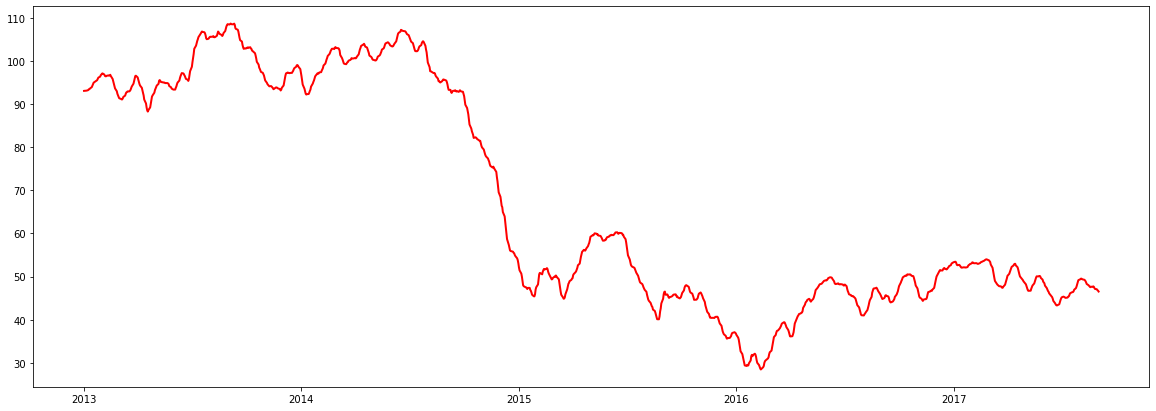

In [17]:
# plotting the oil prices and a moving average over a week

fig, ax = plt.subplots(figsize=(20,7))
ax.plot(df_oil.rolling(window=7,
                       center=True,
                       min_periods=3).mean(),
       linewidth=2,
       color="red")
sns.scatterplot(data=df_oil, x="date", y="dcoilwtico", color="0.5", alpha=0.5, ax=ax)
sns.lineplot(data=df_oil, x="date", y="dcoilwtico", alpha=0.5, ax=ax, linewidth=0.5)
ax.set_title("Oil Prices", fontsize=18)

In [18]:
## working on the training data

df_train.loc[ : , ['date', 'sales']][df_train.date>="2015-07"]

,date,sales
id,,
1619838,2015-07-01,5.000
1619839,2015-07-01,0.000
1619840,2015-07-01,5.000
1619841,2015-07-01,2638.000
1619842,2015-07-01,0.000
...,...,...
3000883,2017-08-15,438.133
3000884,2017-08-15,154.553
3000885,2017-08-15,2419.729


Text(0.5, 1.0, 'Sales Trend - month + year')

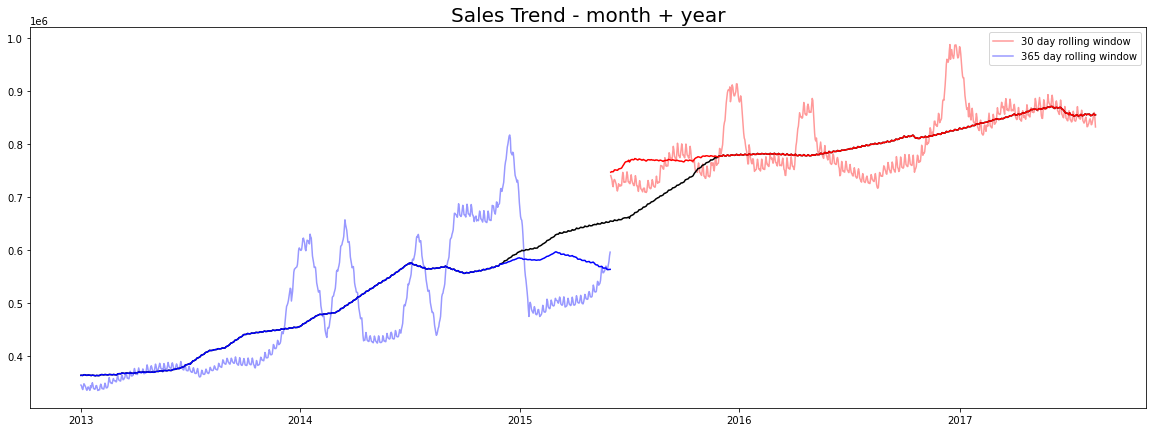

In [19]:
## Plotting for the Sales Trend


fig, ax = plt.subplots(figsize=(20,7))
data_lim = df_train.loc[:, ["date", "sales"]][df_train.date>="2015-06"].groupby("date").sum()
data_pre = df_train.loc[:, ["date", "sales"]][df_train.date<"2015-06"].groupby("date").sum()
data = df_train.loc[:, ["date", "sales"]].groupby("date").sum()
#data.head()
ax.plot(data_lim.rolling(window=30,
                    center=True,
                    min_periods=15).mean(),
        aa=True,
        color="red",
        alpha=0.4
       )
ax.plot(data_pre.rolling(window=30,
                    center=True,
                    min_periods=15).mean(),
        aa=True,
        color="blue",
        alpha=0.4
       )
ax.plot(data.rolling(window=365,
                    center=True,
                    min_periods=182).mean(),
       aa=True,
       color="black"
       )
ax.plot(data_lim.rolling(window=365,
                        center=True,
                        min_periods=182).mean(),
       aa=True,
       color="red")
ax.plot(data_pre.rolling(window=365,
                        center=True,
                        min_periods=182).mean(),
       aa=True,
       color="blue")
ax.legend(['30 day rolling window', '365 day rolling window'])
ax.set_title("Sales Trend - month + year", fontsize=20)

In [30]:
average_sales = df_train.groupby('date').mean()['sales']
df = average_sales.to_frame()


time = np.arange(len(df.index))

df['time'] = time 


X = df.loc[:, ['time']]  # features
y = df.loc[:, 'sales']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)
print(y_pred)

date
2013-01-01    194.232790
2013-01-02    194.427137
2013-01-03    194.621484
2013-01-04    194.815831
2013-01-05    195.010178
                 ...    
2017-08-11    520.541320
2017-08-12    520.735667
2017-08-13    520.930014
2017-08-14    521.124361
2017-08-15    521.318708
Length: 1684, dtype: float64
